In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [5]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [6]:
mensual_p = mensual['n_trips']

In [7]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [8]:
mensual_p = mensual_p.reset_index()

In [9]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [90]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 20, mcmc_samples=20, interval_width= 0.8, seasonality_prior_scale=5,changepoint_prior_scale =0.04 )

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/qxp3u6ym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/is9habb3.json
00:01:17 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=77414', 'data', 'file=/tmp/tmplnvzjdhf/qxp3u6ym.json', 'init=/tmp/tmplnvzjdhf/is9habb3.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_model065bzk_2/prophet_model-20241119000117_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=77414', 'data', 'file=/tmp/tmplnvzjdhf/qxp3u6ym.json', 'init=/tmp/tmplnvzjdhf/is9habb3.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_model065bzk_2/prophet_model-20241119000117_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

00:01:17 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=77414', 'data', 'file=/tmp/tmplnvzjdhf/qxp3u6ym.json', 'init=/tmp/tmplnvzjdhf/is9habb3.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_model065bzk_2/prophet_model-20241119000117_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_model065bzk_2/prophet_model-20241119000117_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_model065bzk_2/prophet_model-20241119000117_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [91]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.913153e+06,2.563111e+06,3.424040e+06,2.747849e+06,3.105549e+06,106949.246065,-1.451549e+05,2.971562e+05,106949.246065,-1.451549e+05,2.971562e+05,0.0,0.0,0.0,3.020103e+06
1,2022-04-30,2.894489e+06,2.687649e+06,3.303788e+06,2.743646e+06,3.090109e+06,111468.874589,-5.300372e+04,2.774820e+05,111468.874589,-5.300372e+04,2.774820e+05,0.0,0.0,0.0,3.005958e+06
2,2022-05-31,2.876043e+06,2.770149e+06,3.431030e+06,2.720941e+06,3.071218e+06,169438.025760,-1.088924e+05,3.544997e+05,169438.025760,-1.088924e+05,3.544997e+05,0.0,0.0,0.0,3.045481e+06
3,2022-06-30,2.857942e+06,2.645864e+06,3.204165e+06,2.693091e+06,3.047886e+06,73544.164615,-1.455571e+05,2.383123e+05,73544.164615,-1.455571e+05,2.383123e+05,0.0,0.0,0.0,2.931486e+06
4,2022-07-31,2.839001e+06,2.330665e+06,2.980093e+06,2.672031e+06,3.022185e+06,-268282.714948,-5.145077e+05,-4.436776e+04,-268282.714948,-5.145077e+05,-4.436776e+04,0.0,0.0,0.0,2.570719e+06
5,2022-08-31,2.820138e+06,2.181920e+06,2.781701e+06,2.655591e+06,2.999862e+06,-291669.037039,-6.370931e+05,-9.879481e+04,-291669.037039,-6.370931e+05,-9.879481e+04,0.0,0.0,0.0,2.528469e+06
6,2022-09-30,2.801182e+06,2.126986e+06,2.939725e+06,2.641409e+06,2.975601e+06,-313293.606504,-6.281406e+05,-4.543151e+04,-313293.606504,-6.281406e+05,-4.543151e+04,0.0,0.0,0.0,2.487888e+06
7,2022-10-31,2.781532e+06,2.560642e+06,3.162812e+06,2.621446e+06,2.955157e+06,102326.979221,-2.634106e+05,3.974759e+05,102326.979221,-2.634106e+05,3.974759e+05,0.0,0.0,0.0,2.883859e+06
8,2022-11-30,2.764324e+06,2.445963e+06,3.210641e+06,2.602967e+06,2.936700e+06,-53598.472178,-1.975863e+05,1.422812e+05,-53598.472178,-1.975863e+05,1.422812e+05,0.0,0.0,0.0,2.710725e+06
9,2022-12-31,2.746221e+06,2.369152e+06,3.179432e+06,2.578947e+06,2.917189e+06,65621.169125,-1.129480e+05,2.369050e+05,65621.169125,-1.129480e+05,2.369050e+05,0.0,0.0,0.0,2.811842e+06


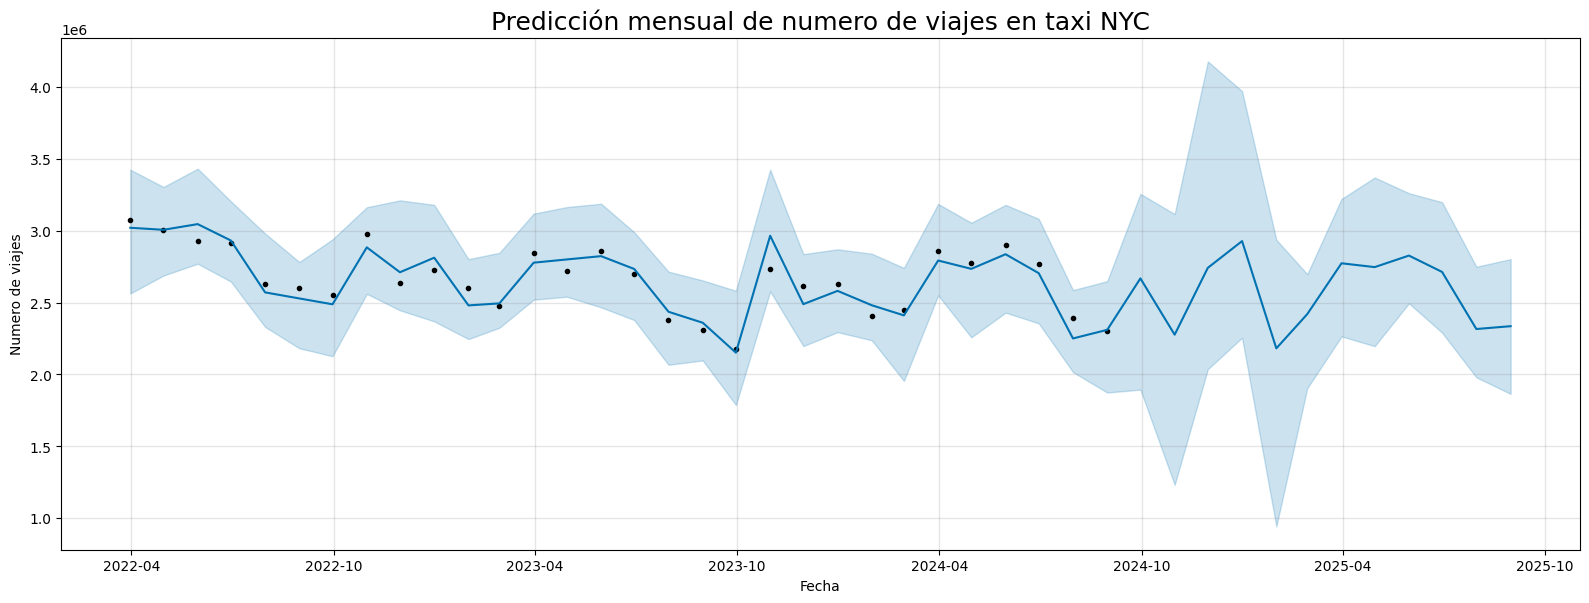

In [92]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

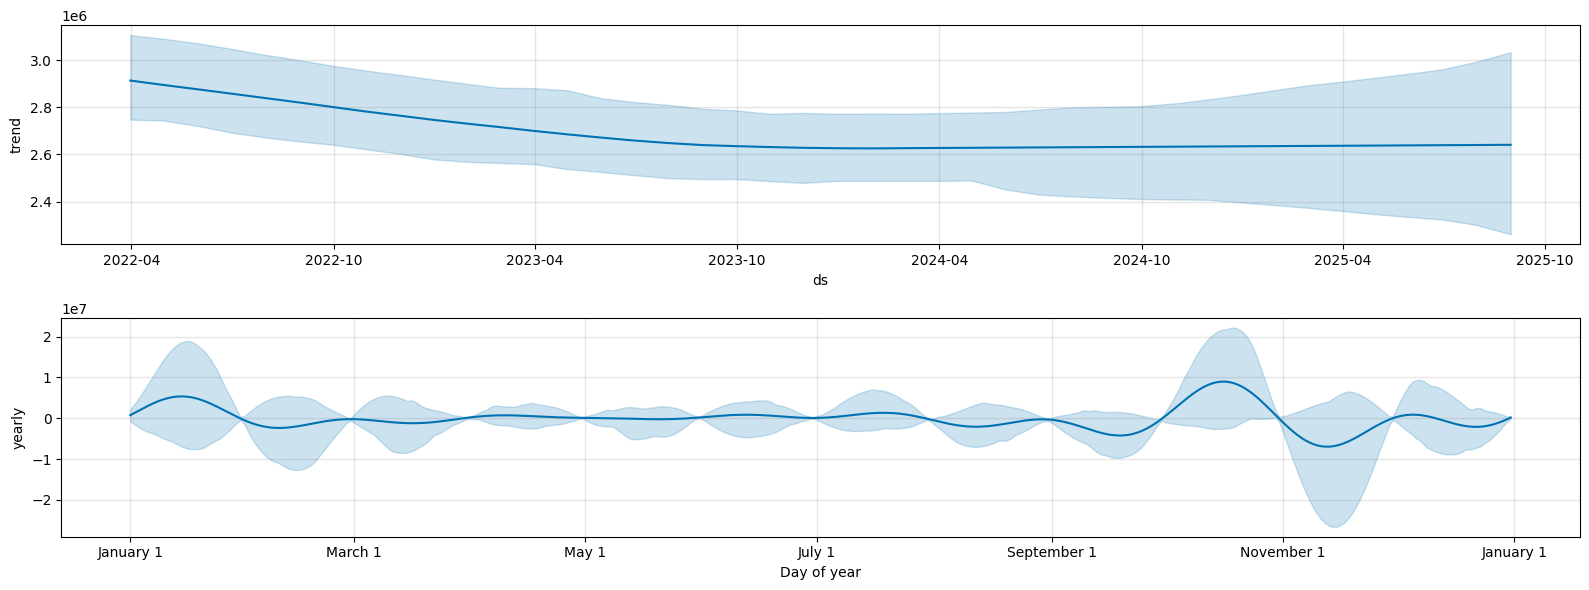

In [93]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [94]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [95]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/my619i70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/2j10zlnh.json
00:01:26 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=34997', 'data', 'file=/tmp/tmplnvzjdhf/my619i70.json', 'init=/tmp/tmplnvzjdhf/2j10zlnh.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelrlgc79f4/prophet_model-20241119000126_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=34997', 'data', 'file=/tmp/tmplnvzjdhf/my619i70.json', 'init=/tmp/tmplnvzjdhf/2j10zlnh.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelrlgc79f4/prophet_model-20241119000126_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

00:01:27 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=34997', 'data', 'file=/tmp/tmplnvzjdhf/my619i70.json', 'init=/tmp/tmplnvzjdhf/2j10zlnh.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelrlgc79f4/prophet_model-20241119000126_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelrlgc79f4/prophet_model-20241119000126_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelrlgc79f4/prophet_model-20241119000126_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [96]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,2.030700e+06,1.335022e+05,3.823038e+06,2179200,2023-09-01
1,2023-10-31,2.752488e+06,1.585210e+06,3.309753e+06,2736389,2023-09-01
2,2023-11-30,2.285933e+06,1.189416e+06,3.390190e+06,2616757,2023-09-01
3,2023-12-31,2.997618e+06,2.255547e+06,3.987649e+06,2625768,2023-09-01
4,2024-01-31,2.515125e+06,1.474784e+06,3.259574e+06,2409342,2023-09-01
5,2024-02-29,3.949977e+06,1.782862e+06,6.940190e+06,2448952,2023-09-01
6,2024-03-31,2.160682e+06,9.276893e+05,2.757231e+06,2858661,2023-09-01
7,2024-04-30,3.058730e+06,1.399895e+06,4.623917e+06,2777362,2023-09-01
8,2024-05-31,1.856866e+06,1.102278e+05,3.909950e+06,2899539,2023-09-01
9,2024-06-30,1.640005e+06,3.178907e+05,2.693639e+06,2767032,2023-09-01


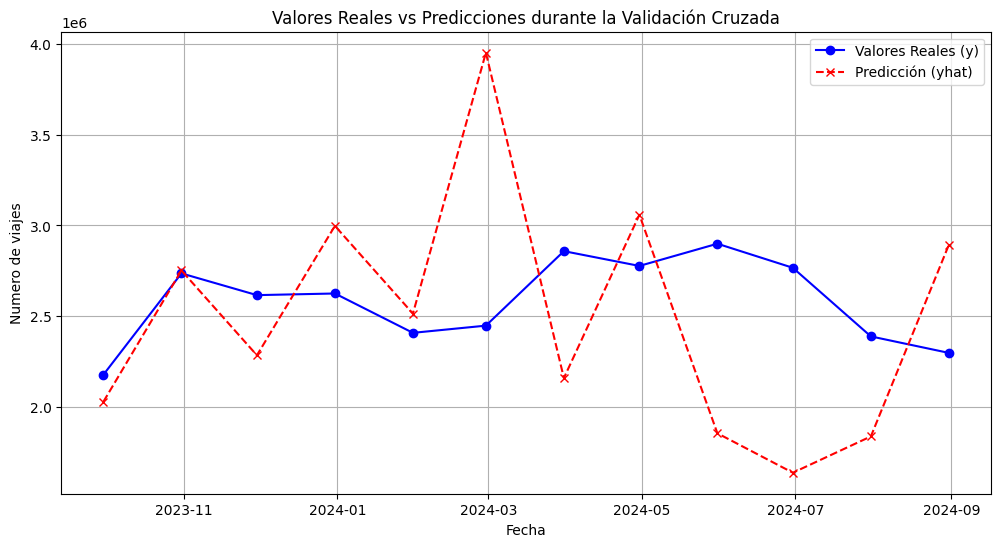

In [97]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


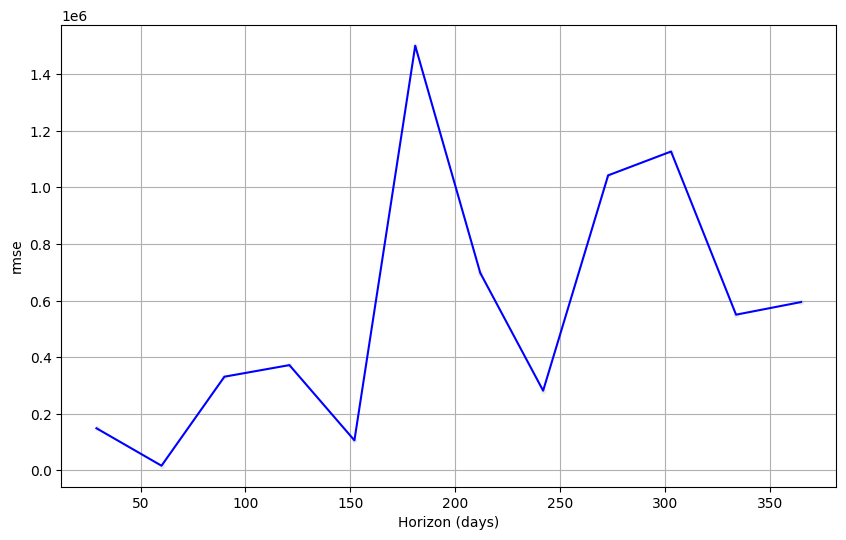

In [99]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [ ]:
df_p_1 = performance_metrics(df_cv_1)

In [100]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 563995.6295923693


In [101]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 563995.6295923693


In [102]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 0.8333333333333334


In [103]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.21667937479649899


In [98]:
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,1.200000e+01,1.200000e+01,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,5.095247e+11,5.639956e+05,5.639956e+05,0.216679,0.216679,0.222446,0.833333
std,109 days 20:33:46.987269072,6.907353e+11,4.569866e+05,4.569866e+05,0.175789,0.175789,0.173066,0.389249
min,29 days 00:00:00,2.591681e+08,1.609870e+04,1.609870e+04,0.005883,0.005883,0.005866,0.000000
25%,113 days 06:00:00,6.488917e+10,2.481513e+05,2.481513e+05,0.093017,0.093017,0.089955,1.000000
50%,196 days 12:00:00,2.204304e+11,4.609651e+05,4.609651e+05,0.185899,0.185899,0.182011,1.000000
75%,280 days 12:00:00,6.371735e+11,7.841530e+05,7.841530e+05,0.283921,0.283921,0.318194,1.000000
max,365 days 00:00:00,2.253075e+12,1.501025e+06,1.501025e+06,0.612925,0.612925,0.511467,1.000000


In [104]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,5.095247e+11,713810.022579,563995.629592,0.216679,0.185899,0.222446,0.833333


In [105]:
#forecast_1.to_csv('forecast_mensual.csv')